In [40]:
'''
about: fft on accelerometer data
author: aakash (@nimrobotics)
license: MIT
'''

'\nabout: fft on accelerometer data\nauthor: aakash (@nimrobotics)\nlicense: MIT\n'

# Finding the constituent frequencies of a signal

Any signal can be represented as a sum of sinusoids of different frequencies. This is the basis of Fourier analysis. In this notebook, we will see how to find the constituent frequencies of a signal using the Fourier transform. We will also see how to plot the frequency spectrum of a signal.

## Load the required libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import pandas as pd

## Create your own signal

The combined signal is created as sum of all the pure sinusoids.

In [41]:
# Number of sample points
N = 1000
# Define the time array
time = np.linspace(0, 10, N)  # 10 seconds with 1000 points

# Define the two sinusoidal signals
freq1 = 2  # Frequency of the first signal (in Hz)
freq2 = 5  # Frequency of the second signal (in Hz)
freq3 = 10  # Frequency of the third signal (in Hz)

sig1 = np.sin(2 * np.pi * freq1 * time)
sig2 = np.sin(2 * np.pi * freq2 * time)
sig3 = np.sin(2 * np.pi * freq3 * time)

# Combine the two signals
combined_signal = sig1 + sig2 + sig3

## Let's see what the signal looks like

Text(0, 0.5, 'Amplitude')

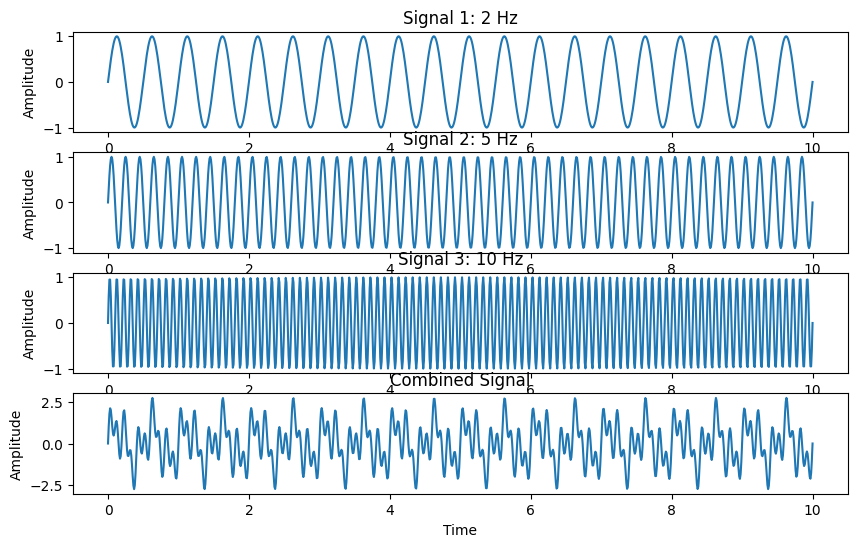

In [42]:
# plot the signals in different subplots
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(time, sig1)
plt.title('Signal 1: 2 Hz')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(time, sig2)
plt.title('Signal 2: 5 Hz')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 3)
plt.plot(time, sig3)
plt.title('Signal 3: 10 Hz')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(time, combined_signal)
plt.title('Combined Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')


## Lets see the frequency spectrum of the signal

The frequency spectrum of a signal is obtained by taking the Fourier transform of the signal. The Fourier transform of a signal gives the amplitude and phase of the sinusoids that make up the signal. The frequency spectrum is a plot of the amplitude of the sinusoids as a function of their frequency.

tl;dr: this is the ~reverse process of creating a signal from its constituent frequencies.

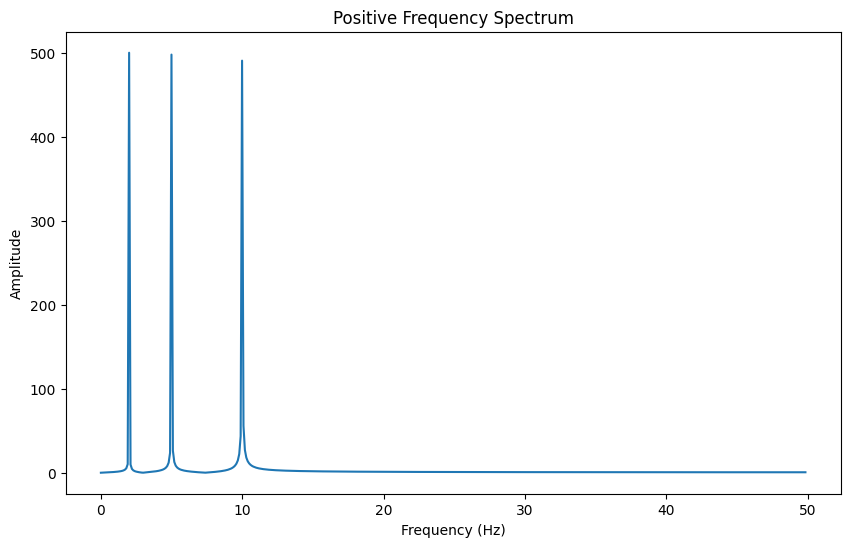

In [46]:
# Perform Fourier transform
fft_signal = fft(combined_signal)
freqs = fftfreq(len(time), time[1] - time[0])

# plt.plot(fft_signal)
# plt.show()

# Plot only positive frequencies
positive_freqs = freqs[freqs >= 0]
positive_amplitudes = np.abs(fft_signal)[freqs >= 0]

plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_amplitudes)
plt.title('Positive Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()

## See the spectrum of your own data



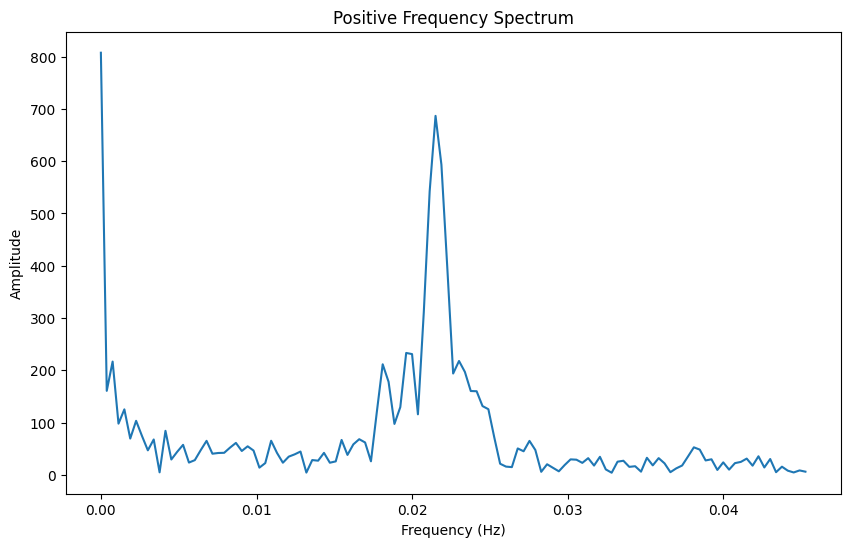

In [48]:
# load csv file
data = pd.read_csv('acc-data.csv') # timestamp (unix), AccY
time = data['timestamp']
acc_y = data['AccY']

# Perform Fourier transform
fft_signal = fft(acc_y.values)
freqs = fftfreq(len(time), time[1] - time[0])

# Plot only positive frequencies
positive_freqs = freqs[freqs >= 0]
positive_amplitudes = np.abs(fft_signal)[freqs >= 0]

plt.figure(figsize=(10, 6))
plt.plot(positive_freqs, positive_amplitudes)
plt.title('Positive Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()
